# Customer Demographic and Profile Analysis and Visualisation

In [1]:
import pandas as pd
import numpy as ny
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 4 - Python Fundemental For Data Analyst'

In [5]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Data Immersion\\Achievement 4 - Python Fundemental For Data Analyst'

In [7]:
final_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merge.pkl'))

final_merge.head()

In [9]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int32  
 3   orders_day_of_the_week  int32  
 4   order_hour_of_day       int32  
 5   days_since_last_order   float64
 6   product_id              int32  
 7   add_to_cart_order       int32  
 8   reordered               int32  
 9   product_name            object 
 10  aisle_id                int32  
 11  department_id           int32  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_period_of_day   object 
 16  max_order               int32  
 17  loyalty_flag            object 
 18  avg_price               float64
 19  spending flag           object 
 20  avg_days_between_order  float64
 21  order frequency flag    objec

### Security Implications

#### Looking through the columns in the dataset, there are a few which stand out to have security implications. such as first name, surname, age, state, dependants, marital status, alone these columns are okay however combined in this data allows you to indenitfy individuals

#### To combat this, We can remove the customers first name and surname

In [11]:
final_merge = final_merge.drop(columns = ['first_name', 'surname'])

In [13]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int32  
 3   orders_day_of_the_week  int32  
 4   order_hour_of_day       int32  
 5   days_since_last_order   float64
 6   product_id              int32  
 7   add_to_cart_order       int32  
 8   reordered               int32  
 9   product_name            object 
 10  aisle_id                int32  
 11  department_id           int32  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_period_of_day   object 
 16  max_order               int32  
 17  loyalty_flag            object 
 18  avg_price               float64
 19  spending flag           object 
 20  avg_days_between_order  float64
 21  order frequency flag    objec

## Regional 

In [ ]:
## using an if statement to create a new column for each region

In [15]:
result = []
for value in final_merge['state']:
    if value in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
                 result.append('Northeast')
    elif value in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
                result.append('Midwest')
    elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
                 result.append('South')
    elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
                 result.append('West')
    else:
                result.append('Not a Region')

In [19]:
final_merge['region']= result

In [21]:
final_merge['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### crosstab to determine if there’s a difference in spending habits between U.S regions

In [9]:
crosstab = pd.crosstab(final_merge['region'], final_merge['spending flag'], dropna = False)

In [ ]:
crosstab.to_clipboard()

In [45]:
print(crosstab)

spending flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


#### Regional Spending Habit Bar Chart

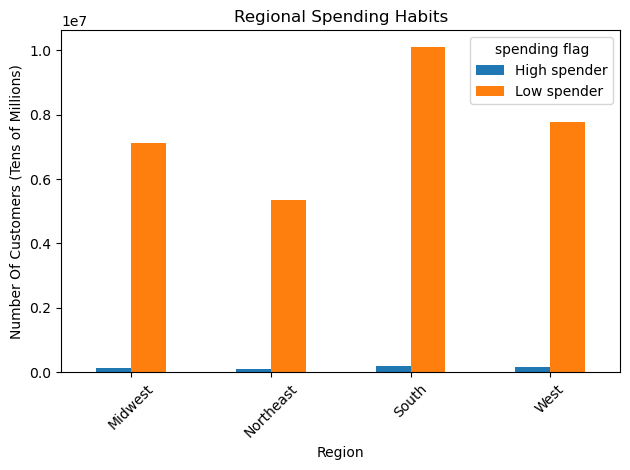

In [13]:
spend_flag_region_bar = crosstab.plot.bar()
plt.title('Regional Spending Habits')
plt.ylabel('Number Of Customers (Tens of Millions)') 
plt.xlabel('Region')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.savefig('spend_flag_region_bar', dpi=300, bbox_inches='tight')

### The bar chart is showing us across america there is drastically more low spenders compared to high spemders. among the regions more customers seem to be from the south

#### Removing Low-activity customers

In [49]:
final_merge['max_order'].value_counts()

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: count, Length: 99, dtype: int64

In [ ]:
### creating an exclusion flag for customer under 5 orders using the max_order column

In [27]:
final_merge.loc[final_merge['max_order'] <5,'exclusion_flag'] = 'exclude'

In [29]:
final_merge.loc[final_merge['max_order'] >=5 ,'exclusion_flag'] = 'stay'

In [31]:
final_merge['exclusion_flag'].value_counts()

exclusion_flag
stay       30964564
exclude     1440295
Name: count, dtype: int64

In [57]:
crosstab = pd.crosstab(final_merge['max_order'], final_merge['exclusion_flag'], dropna = False)

In [ ]:
crosstab.to_clipboard()

In [ ]:
## on excel, we can see orders below 5 is being excluded, while anything 5 and above will stay

In [33]:
final_merge.shape

(32404859, 31)

In [ ]:
## removing all rows with a exclusion flag of exclude

In [35]:
final_merge = final_merge[final_merge[ 'exclusion_flag']=='stay']

In [37]:
final_merge.shape

(30964564, 31)

In [ ]:
## all rows with the excluded flag has been removed 

In [ ]:
final_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merge.pkl'))

## Creating Customer Profile

#### Income Profile

In [17]:
final_merge['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [19]:
final_merge['income'].min()

25903

In [21]:
final_merge['income'].max()

593901

In [55]:
final_merge['income'].mean()

99675.86510754681

In [61]:
final_merge['income'].std()

43141.86552615198

In [63]:
final_merge['income'].median()

96765.0

In [ ]:
## anything below -1 std will be low income, anything about 1 std will be high income, i will be rounding to the closest 5k

In [9]:
final_merge.loc[final_merge['income'] <=55000,'income_group'] = 'Low Income'

In [11]:
final_merge.loc[(final_merge['income'] >55000) & (final_merge['income'] <=145000), 'income_group'] = 'Middle Income'

In [13]:
final_merge.loc[final_merge['income'] >145000,'income_group'] = 'High Income'

In [15]:
final_merge['income_group'].value_counts()

income_group
Middle Income    21731825
High Income       4780351
Low Income        4452388
Name: count, dtype: int64

#### Income Group Bar Chart

Text(0.5, 0, '')

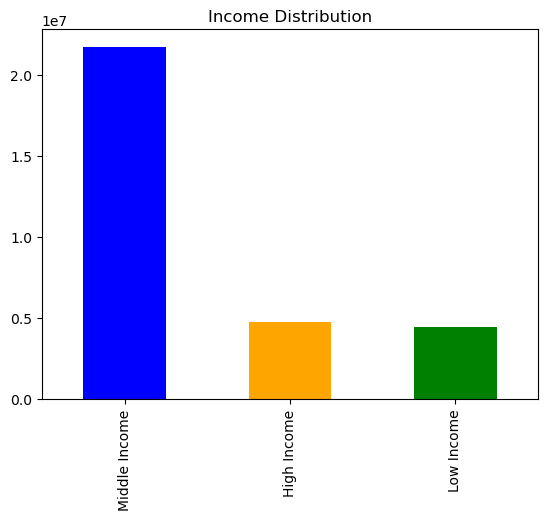

In [155]:
income_bar = final_merge['income_group'].value_counts().plot.bar(color = ['blue','orange','green'])
plt.title('Income Distribution')
plt.xlabel("")
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'income_bar.png'))

Text(0.5, 1.0, 'Income Distrubtion')

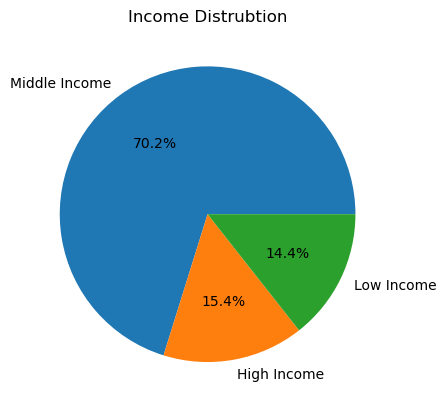

In [123]:
income_pie = final_merge['income_group'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel("")
plt.title('Income Distrubtion')
income_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'income_pie.png'))

In [ ]:
## 70% of customers are in the middle income range earning between 55k and 145k

#### Age Group Profile

In [77]:
final_merge['age'].min()

18

In [79]:
final_merge['age'].max()

81

In [81]:
final_merge['age'].mean()

49.4680256760599

In [83]:
final_merge['age'].median()

49.0

In [85]:
final_merge['age'].std()

18.485279133157462

In [19]:
final_merge.loc[final_merge['age'] <=25,'age_group'] = 'Young adult'

In [21]:
final_merge.loc[(final_merge['age'] >25) & (final_merge['age'] <=50), 'age_group'] = 'Adult'

In [23]:
final_merge.loc[(final_merge['age'] >50) & (final_merge['age'] <=70), 'age_group'] = 'Middle age'

In [25]:
final_merge.loc[final_merge['age'] >70,'age_group'] = 'Senior Adult'

In [9]:
final_merge['age_group'].value_counts()

age_group
Adult           12152547
Middle age       9614850
Senior Adult     5332649
Young adult      3864518
Name: count, dtype: int64

Text(0.5, 0, '')

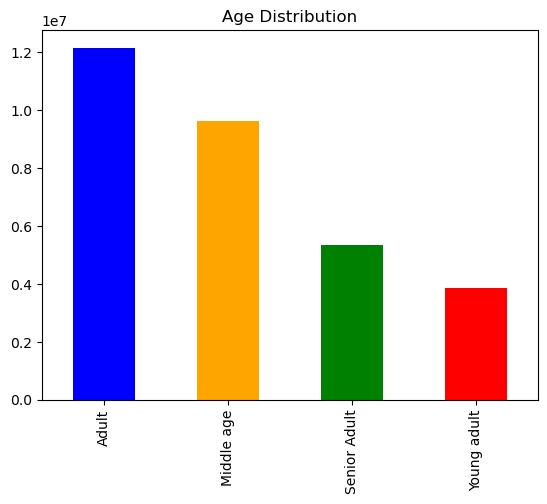

In [153]:
age_bar = final_merge['age_group'].value_counts().plot.bar(color = ['blue','orange','green', 'red'])
plt.title('Age Distribution')
plt.xlabel("")
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'age_bar.png'))

Text(0.5, 1.0, 'Age Distribution')

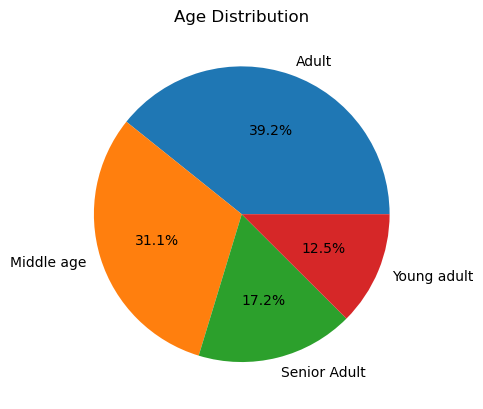

In [129]:
age_pie=final_merge['age_group'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel("")
plt.title('Age Distribution')

In [ ]:
## almost 40% of instacarts customers are aged betweeen 25 and 50 years old.

#### Dependants Group Profile 

In [ ]:
## Spliting  customers on dependents

In [141]:
final_merge.loc[final_merge['dependants'] ==0,'dependants_group'] = 'No Dependants'

In [143]:
final_merge.loc[final_merge['dependants'] >=1,'dependants_group'] = 'Dependants'

In [ ]:
==0, 'No Dependants'
>=1, 'Dependants'

In [145]:
final_merge['dependants_group'].value_counts()

dependants_group
Dependants       23224883
No Dependants     7739681
Name: count, dtype: int64

Text(0.5, 0, '')

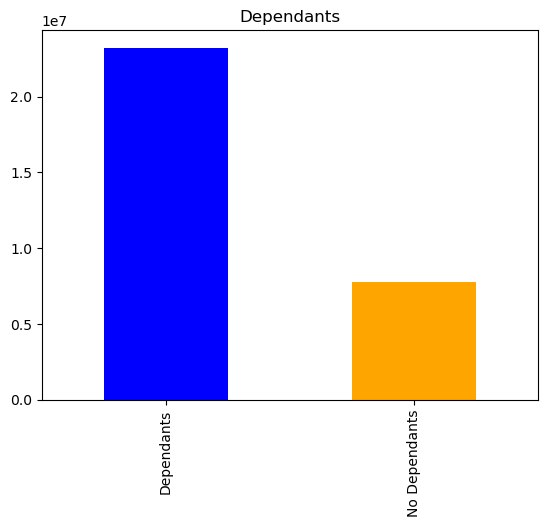

In [151]:
dependants_bar = final_merge['dependants_group'].value_counts().plot.bar(color = ['blue','orange'])
plt.title('Dependants')
plt.xlabel("")
dependants_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'dependants_bar.png'))

Text(0.5, 1.0, 'Dependants')

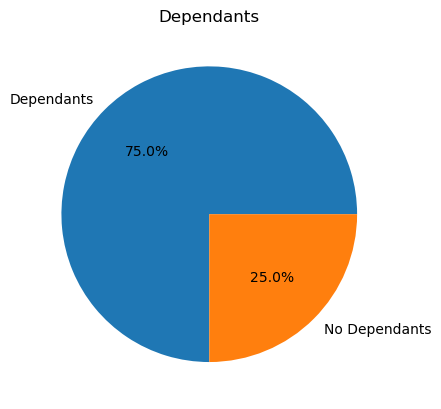

In [173]:
dependants_pie =final_merge['dependants_group'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel("")
plt.title('Dependants')
dependants_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisation', 'dependants_pie.png'))

In [ ]:
## 75% of instacarts customers have 1 or more dependants

#### Customer Loyalty Profile

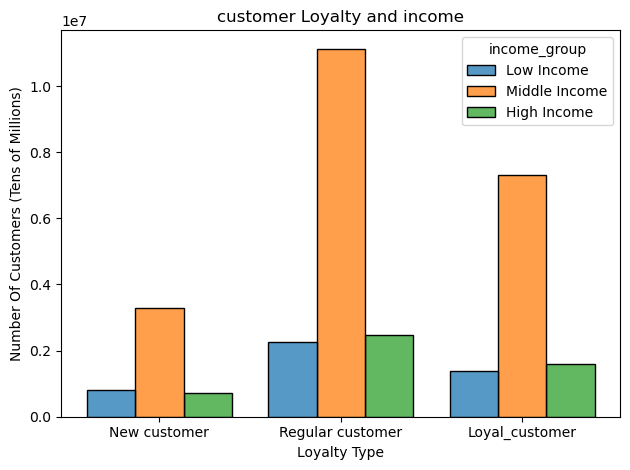

In [17]:
loyal_income_hist = sns.histplot(data=final_merge, x='loyalty_flag', hue='income_group', multiple='dodge',shrink=.8)
plt.title('customer Loyalty and income')
plt.ylabel('Number Of Customers (Tens of Millions)') 
plt.xlabel('Loyalty Type')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('loyal_income_hist', dpi=300, bbox_inches='tight')

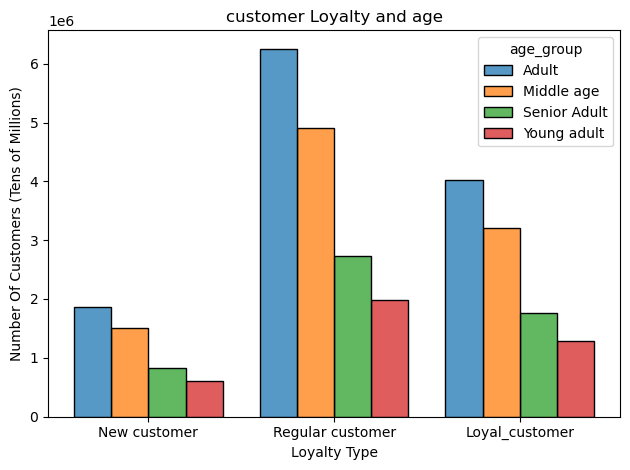

In [19]:
loyal_age_hist = sns.histplot(data=final_merge, x='loyalty_flag', hue='age_group', multiple='dodge',shrink=.8)
plt.title('customer Loyalty and age')
plt.ylabel('Number Of Customers (Tens of Millions)') 
plt.xlabel('Loyalty Type')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('loyal_age_hist', dpi=300, bbox_inches='tight')

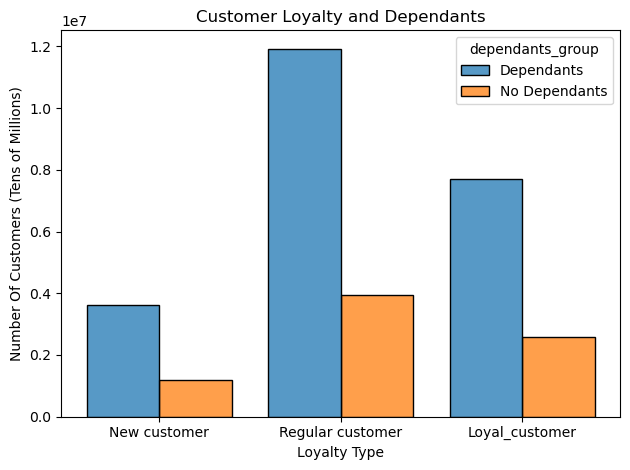

In [23]:
loyal_dependants_hist = sns.histplot(data=final_merge, x='loyalty_flag', hue='dependants_group', multiple='dodge',shrink=.8)
plt.title('Customer Loyalty and Dependants')
plt.ylabel('Number Of Customers (Tens of Millions)') 
plt.xlabel('Loyalty Type')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('loyal_dependants_hist', dpi=300, bbox_inches='tight')

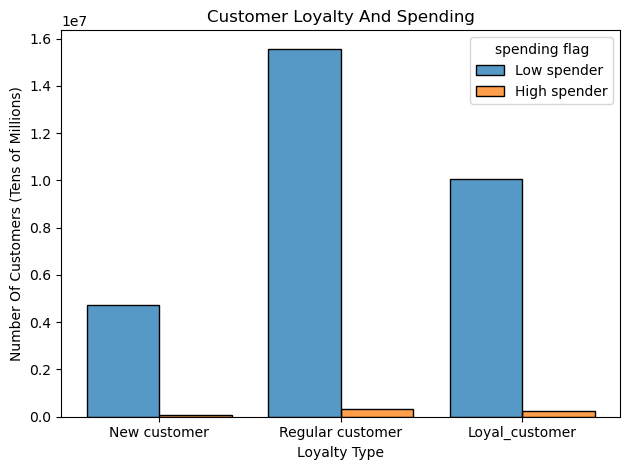

In [25]:
loyal_spend_hist = sns.histplot(data=final_merge, x='loyalty_flag', hue='spending flag', multiple='dodge',shrink=.8)
plt.title('Customer Loyalty And Spending')
plt.ylabel('Number Of Customers (Tens of Millions)') 
plt.xlabel('Loyalty Type')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('loyal_spend_hist', dpi=300, bbox_inches='tight')

In [175]:
final_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merge.pkl'))

### Customer profile analysis on Usage and Expenditure

In [7]:
final_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_merge.pkl'))

In [ ]:
## Grouping Datasets

In [13]:
customer = final_merge.groupby(['user_id','order_number','loyalty_flag','spending flag','region','age_group','income_group','marital_status','dependants_group','days_since_last_order'])['prices'].sum().reset_index()

In [17]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901753 entries, 0 to 2901752
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user_id                int32  
 1   order_number           int32  
 2   loyalty_flag           object 
 3   spending flag          object 
 4   region                 object 
 5   age_group              object 
 6   income_group           object 
 7   marital_status         object 
 8   dependants_group       object 
 9   days_since_last_order  float64
 10  prices                 float64
dtypes: float64(2), int32(2), object(7)
memory usage: 221.4+ MB


In [21]:
customer.head(20)

,user_id,order_number,loyalty_flag,spending flag,region,age_group,income_group,marital_status,dependants_group,days_since_last_order,prices
0,1,2,New customer,Low spender,South,Adult,Low Income,married,Dependants,15.0,35.4
1,1,3,New customer,Low spender,South,Adult,Low Income,married,Dependants,21.0,28.2
2,1,4,New customer,Low spender,South,Adult,Low Income,married,Dependants,29.0,26.0
3,1,5,New customer,Low spender,South,Adult,Low Income,married,Dependants,28.0,57.0
4,1,6,New customer,Low spender,South,Adult,Low Income,married,Dependants,19.0,25.0
5,1,7,New customer,Low spender,South,Adult,Low Income,married,Dependants,20.0,29.0
6,1,8,New customer,Low spender,South,Adult,Low Income,married,Dependants,14.0,40.2
7,1,9,New customer,Low spender,South,Adult,Low Income,married,Dependants,0.0,40.2
8,1,10,New customer,Low spender,South,Adult,Low Income,married,Dependants,30.0,63.1
9,2,2,Regular customer,Low spender,West,Middle age,Middle Income,married,Dependants,10.0,19.0


In [ ]:
## ranaming price to expenditure and days_since_last_order to usage frequency 

In [33]:
customer.rename(columns = {'prices': 'expenditure'}, inplace = True)

In [27]:
customer.rename(columns = {'days_since_last_order': 'usage frequency'}, inplace = True)

In [35]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901753 entries, 0 to 2901752
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           int32  
 1   order_number      int32  
 2   loyalty_flag      object 
 3   spending flag     object 
 4   region            object 
 5   age_group         object 
 6   income_group      object 
 7   marital_status    object 
 8   dependants_group  object 
 9   usage frequency   float64
 10  expenditure       float64
dtypes: float64(2), int32(2), object(7)
memory usage: 221.4+ MB


In [ ]:
## Income Aggregate

In [37]:
customer.groupby('income_group').agg({'usage frequency':['mean','min','max'],'expenditure':['mean','min','max']})  

usage frequency            expenditure               
                         mean  min   max        mean  min       max
income_group                                                       
High Income         10.179269  0.0  30.0  300.801892  1.0  100452.9
Low Income          10.976417  0.0  30.0   56.764504  1.0     875.0
Middle Income       10.276768  0.0  30.0   97.640136  1.0  100384.5

In [39]:
customer.groupby('dependants_group').agg({'usage frequency':['mean','min','max'],'expenditure':['mean','min','max']})

usage frequency            expenditure               
                            mean  min   max        mean  min       max
dependants_group                                                      
Dependants             10.388225  0.0  30.0  120.027807  1.0  100452.9
No Dependants          10.378169  0.0  30.0  121.866791  1.0  100384.5

In [41]:
customer.groupby('age_group').agg({'usage frequency':['mean','min','max'],'expenditure':['mean','min','max']})

usage frequency            expenditure               
                        mean  min   max        mean  min       max
age_group                                                         
Adult              10.396124  0.0  30.0  120.917694  1.0  100442.8
Middle age         10.381024  0.0  30.0  120.287479  1.0  100452.9
Senior Adult       10.374254  0.0  30.0  117.565742  1.0  100330.2
Young adult        10.380577  0.0  30.0  123.717587  1.0  100265.6

### Customer Profiles With Regions and Departments

In [7]:
dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_dep_t_new.csv'), index_col = False)

In [9]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [11]:
dep.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [13]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [15]:
dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
## creating a subset with the region anc customer profile to merge with the departments

In [45]:
cust_prof= final_merge[['order_id',
'user_id',
'order_number',
'product_id',
'product_name',
'department_id',
'prices',
'loyalty_flag',
'spending flag',
'order frequency flag',
'gender',
'state',
'age',
'dependants',
'marital_status',
'income','region',
'income_group',
'age_group',
'dependants_group']]

In [47]:
cust_prof.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   order_id              int32  
 1   user_id               int32  
 2   order_number          int32  
 3   product_id            int32  
 4   product_name          object 
 5   department_id         int32  
 6   prices                float64
 7   loyalty_flag          object 
 8   spending flag         object 
 9   order frequency flag  object 
 10  gender                object 
 11  state                 object 
 12  age                   int32  
 13  dependants            int64  
 14  marital_status        object 
 15  income                int32  
 16  region                object 
 17  income_group          object 
 18  age_group             object 
 19  dependants_group      object 
dtypes: float64(1), int32(7), int64(1), object(11)
memory usage: 4.0+ GB


In [53]:
cust_prof.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer profile.pkl'))

In [33]:
cust_prof_dep= cust_prof.merge(dep, on=['department_id'], how = 'inner', indicator= True)

In [35]:
cust_prof_dep.head()

,order_id,user_id,order_number,product_id,product_name,department_id,prices,loyalty_flag,spending flag,order frequency flag,...,age,dependants,marital_status,income,region,income_group,age_group,dependants_group,department,_merge
0,2539329,1,1,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,...,31,3,married,40423,South,Low Income,Adult,Dependants,beverages,both
1,2539329,1,1,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,New customer,Low spender,Non-frequent customer,...,31,3,married,40423,South,Low Income,Adult,Dependants,dairy eggs,both
2,2539329,1,1,12427,Original Beef Jerky,19,4.4,New customer,Low spender,Non-frequent customer,...,31,3,married,40423,South,Low Income,Adult,Dependants,snacks,both
3,2539329,1,1,26088,Aged White Cheddar Popcorn,19,4.7,New customer,Low spender,Non-frequent customer,...,31,3,married,40423,South,Low Income,Adult,Dependants,snacks,both
4,2539329,1,1,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,New customer,Low spender,Non-frequent customer,...,31,3,married,40423,South,Low Income,Adult,Dependants,household,both


In [49]:
cust_prof_dep['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [51]:
cust_prof_dep=cust_prof_dep.drop(columns=['_merge'])

In [53]:
cust_prof_dep.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer profile department.pkl'))

In [27]:
cust_prof_dep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer profile department.pkl'))

In [9]:
cust_prof_dep.head()

,order_id,user_id,order_number,product_id,product_name,department_id,prices,loyalty_flag,spending flag,order frequency flag,...,state,age,dependants,marital_status,income,region,income_group,age_group,dependants_group,department
0,2539329,1,1,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,...,Alabama,31,3,married,40423,South,Low Income,Adult,Dependants,beverages
1,2539329,1,1,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,New customer,Low spender,Non-frequent customer,...,Alabama,31,3,married,40423,South,Low Income,Adult,Dependants,dairy eggs
2,2539329,1,1,12427,Original Beef Jerky,19,4.4,New customer,Low spender,Non-frequent customer,...,Alabama,31,3,married,40423,South,Low Income,Adult,Dependants,snacks
3,2539329,1,1,26088,Aged White Cheddar Popcorn,19,4.7,New customer,Low spender,Non-frequent customer,...,Alabama,31,3,married,40423,South,Low Income,Adult,Dependants,snacks
4,2539329,1,1,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,New customer,Low spender,Non-frequent customer,...,Alabama,31,3,married,40423,South,Low Income,Adult,Dependants,household


In [11]:
cust_prof_dep['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

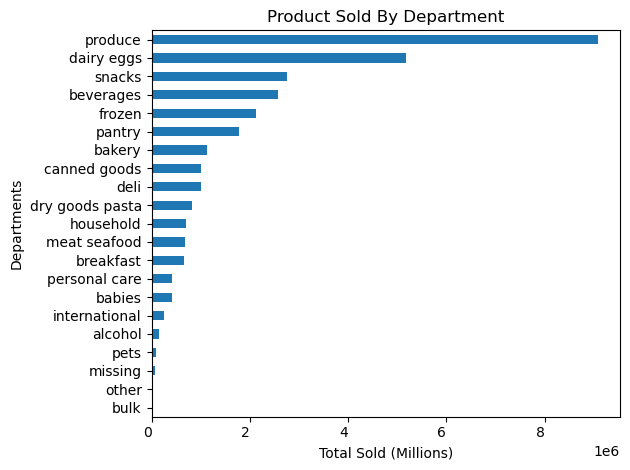

In [19]:
department=cust_prof_dep['department'].value_counts().sort_values(ascending = True).plot.barh()
plt.title('Product Sold By Department')
plt.ylabel('Departments') 
plt.xlabel('Total Sold (Millions)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.savefig('department', dpi=300, bbox_inches='tight')

In [21]:
cust_prof_dep['region'].value_counts()

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

Text(0.5, 1.0, 'Region')

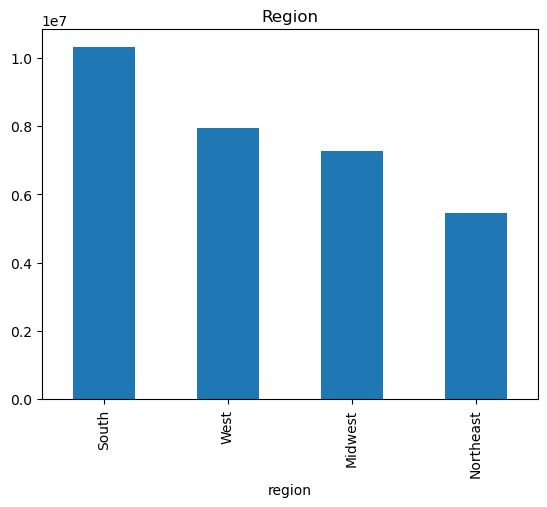

In [29]:
cust_prof_dep['region'].value_counts().plot.bar()
plt.title('Region')

In [41]:
region_income_group = pd.crosstab(cust_prof_dep['income_group'], cust_prof_dep['region'], dropna = False)

In [43]:
region_income_group

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1126997,842620,1578865,1231869
Low Income,1025408,789479,1509183,1128318
Middle Income,5109108,3832586,7223091,5567040


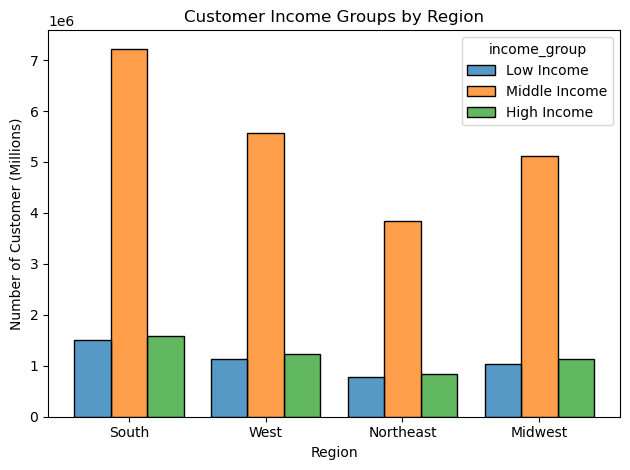

In [29]:
region_income_group_hist = sns.histplot(data=cust_prof_dep, x='region', hue='income_group', multiple='dodge',shrink=.8)
plt.title('Customer Income Groups by Region')
plt.ylabel('Number of Customer (Millions)') 
plt.xlabel('Region')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('region_income_group_hist', dpi=300, bbox_inches='tight')

In [41]:
department_income_group = pd.crosstab(cust_prof_dep['department'], cust_prof_dep['income_group'], dropna = False)

In [83]:
department_income_group

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,27851,22199,94577
babies,66033,43438,300921
bakery,181165,144086,795577
beverages,382734,479742,1709425
breakfast,101746,116540,452564
bulk,4582,5974,22895
canned goods,163485,112945,735644
dairy eggs,809874,680816,3686492
deli,154627,141758,707449


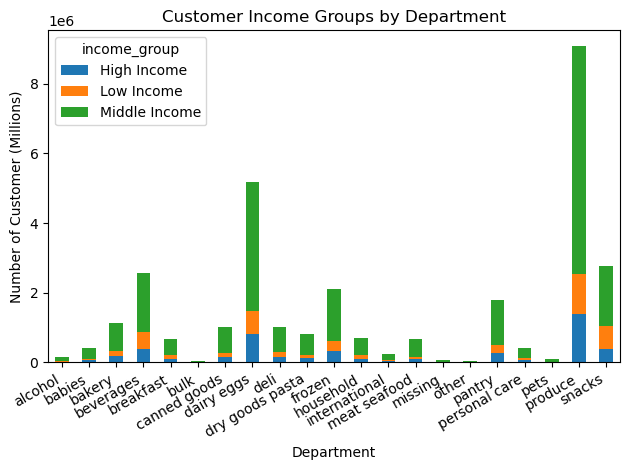

In [43]:
department_income_group=department_income_group.plot.bar(stacked = True)
plt.title('Customer Income Groups by Department')
plt.ylabel('Number of Customer (Millions)')
plt.xlabel('Department')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('department_income_group', dpi=300, bbox_inches='tight')

In [93]:
region_age_group = pd.crosstab(cust_prof_dep['age_group'], cust_prof_dep['region'], dropna = False)

In [95]:
region_age_group

region,Midwest,Northeast,South,West
age_group,,,,
Adult,2870485,2127030,4052038,3102994
Middle age,2260578,1708464,3166730,2479078
Senior Adult,1232295,949282,1777382,1373690
Young adult,898155,679909,1314989,971465


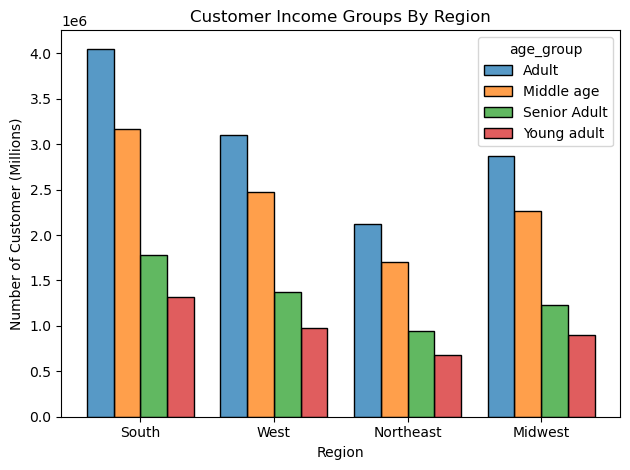

In [31]:
region_age_group_hist = sns.histplot(data=cust_prof_dep, x='region', hue='age_group', multiple='dodge',shrink=.8)
plt.title('Customer Income Groups By Region')
plt.ylabel('Number of Customer (Millions)') 
plt.xlabel('Region')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('region_age_group_hist', dpi=300, bbox_inches='tight')

In [37]:
department_age_group = pd.crosstab(cust_prof_dep['department'], cust_prof_dep['age_group'], dropna = False)

In [43]:
department_age_group

age_group,Adult,Middle age,Senior Adult,Young adult
department,,,,
alcohol,57300,44108,24031,19188
babies,164089,125542,69527,51234
bakery,439610,347636,193709,139873
beverages,1001641,803789,448128,318343
breakfast,262925,206582,115866,85477
bulk,13223,10206,5716,4306
canned goods,397542,315241,172979,126312
dairy eggs,2043739,1593377,892573,647493
deli,394206,312272,172801,124555


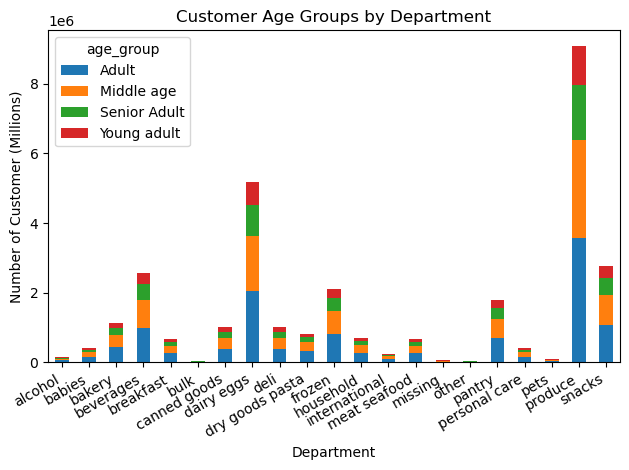

In [39]:
department_age_group=department_age_group.plot.bar(stacked = True)
plt.title('Customer Age Groups by Department')
plt.ylabel('Number of Customer (Millions)')
plt.xlabel('Department')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('department_age_group', dpi=300, bbox_inches='tight')

In [47]:
region_dependant_group = pd.crosstab(cust_prof_dep['dependants_group'], cust_prof_dep['region'], dropna = False)

In [113]:
region_dependant_group

region,Midwest,Northeast,South,West
dependants_group,,,,
Dependants,5438697,4110203,7729206,5946777
No Dependants,1822816,1354482,2581933,1980450


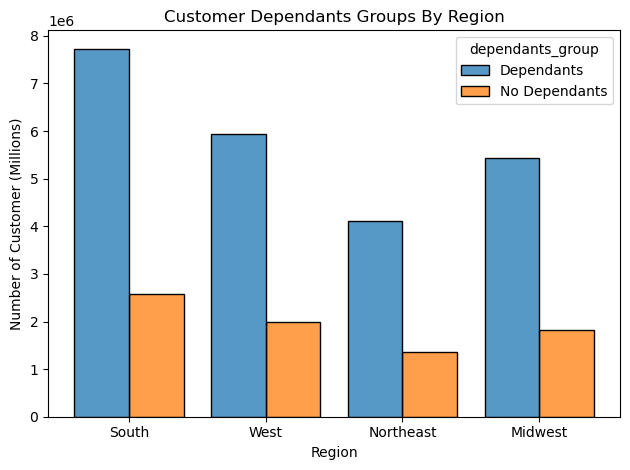

In [33]:
region_dependant_group_hist = sns.histplot(data=cust_prof_dep, x='region', hue='dependants_group', multiple='dodge',shrink=.8)
plt.title('Customer Dependants Groups By Region')
plt.ylabel('Number of Customer (Millions)') 
plt.xlabel('Region')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('region_dependant_group_hist', dpi=300, bbox_inches='tight')

In [51]:
department_dependant_group = pd.crosstab(cust_prof_dep['department'], cust_prof_dep['dependants_group'], dropna = False)

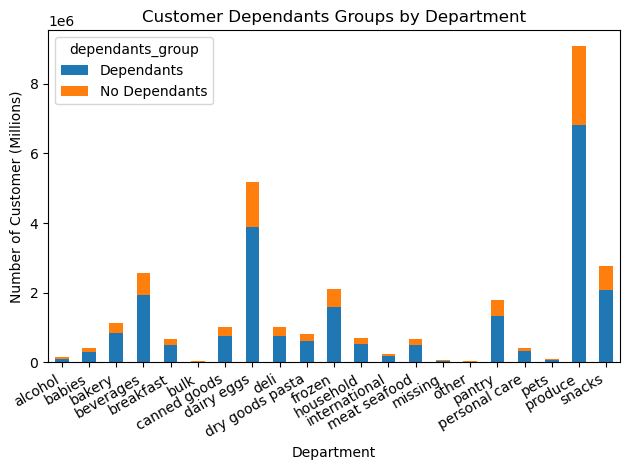

In [53]:
department_dependant_group=department_dependant_group.plot.bar(stacked = True)
plt.title('Customer Dependants Groups by Department')
plt.ylabel('Number of Customer (Millions)')
plt.xlabel('Department')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('ddepartment_dependant_group', dpi=300, bbox_inches='tight')